# Which cards are most effective in winning battles?

We will be splitting the total battle logs into 30:70 with 70% of the data going to trainings set and the remaining 30% as testing set

In [26]:
!pip install graphviz
!pip install pydotplus

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MultiLabelBinarizer
import ast


In [27]:
df=pd.read_csv("../Common/Final Cleaned/battle_log_cleaned.csv")
df['deck1'] = df['deck1'].apply(ast.literal_eval)
df['deck2'] = df['deck2'].apply(ast.literal_eval)
df.head(2)

,type,gameMode,crowns1,startingTrophies2,crowns2,deck1,deck2,max_level_1,level_1,max_level_2,level_2,avg_cards_level_1,avg_cards_level_2,avg_cards_level_diff,1_won,2_won
0,PvP,"{'id': 72000201, 'name': 'Ladder_CrownRush'}",0,5807.0,3,"[Arrows, Bomber, Electro Wizard, Skeleton Army...","[Magic Archer, Mega Knight, Electro Wizard, Go...","[14, 14, 6, 9, 14, 12, 12, 6]","[11, 12, 2, 5, 14, 12, 10, 3]","[6, 6, 6, 9, 6, 9, 14, 12]","[4, 6, 4, 8, 3, 9, 13, 12]",11.75,12.875,1.125,False,True
1,PvP,"{'id': 72000201, 'name': 'Ladder_CrownRush'}",0,5857.0,2,"[Arrows, Bomber, Electro Wizard, Skeleton Army...","[Mini P.E.K.K.A, Wall Breakers, Valkyrie, Gobl...","[14, 14, 6, 9, 14, 12, 12, 6]","[11, 12, 2, 5, 14, 12, 10, 3]","[12, 9, 12, 9, 12, 9, 14, 6]","[12, 7, 10, 8, 10, 9, 12, 4]",11.75,12.625,0.875,False,True


In [28]:
mlb = MultiLabelBinarizer()
X = mlb.fit_transform(df["deck1"])
y = df["1_won"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Training Decision Tree Model on the training set

In [30]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Evaluating the decision tree model on the testing set

In [31]:
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree accuracy:", accuracy)

Decision Tree accuracy: 0.5347644985581544


## Training a random forest model on the training set & Evaluation

In [32]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [33]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest accuracy:", accuracy)


Random Forest accuracy: 0.543735982057033


## Training a Gradient Boosting model on the training set & Evaluation

In [34]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [35]:
y_pred = gb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Gradient Boosting accuracy:", accuracy)


Gradient Boosting accuracy: 0.543735982057033


## Determine the importance of each card feature in the random forest model:

In [36]:
card_importance = pd.DataFrame({
    "Card": mlb.classes_,
    "Importance": rf.feature_importances_
}).sort_values("Importance", ascending=False)
print(card_importance.head(10))


               Card  Importance
102        Valkyrie    0.023955
39    Goblin Barrel    0.022463
98          The Log    0.021873
2            Arrows    0.021782
107             Zap    0.021713
30         Fireball    0.021688
51        Hog Rider    0.021568
105          Wizard    0.021566
67   Mini P.E.K.K.A    0.021449
90    Skeleton Army    0.021148


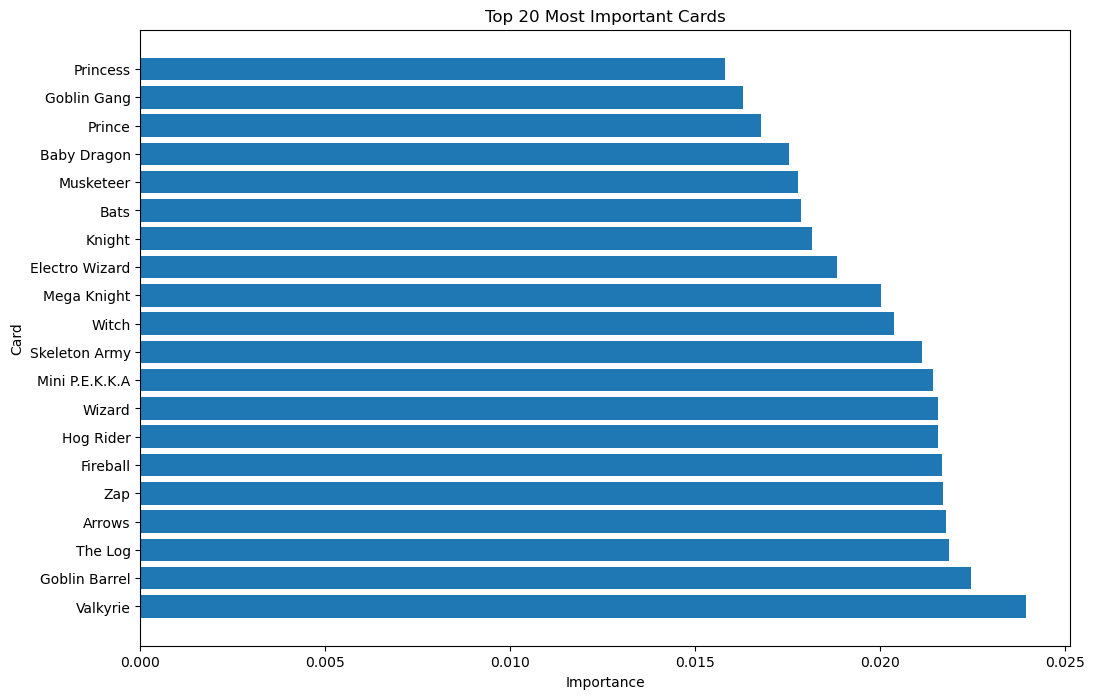

In [54]:
import matplotlib.pyplot as plt

# Plot the importance of each card feature in the random forest model
plt.figure(figsize=(12, 8))
plt.barh(card_importance["Card"][:20], card_importance["Importance"][:20])
plt.title("Top 20 Most Important Cards")
plt.xlabel("Importance")
plt.ylabel("Card")
plt.show()



# Conclusion
the top 10 cards that are most effective in winning battles have been identified. The card "Valkyrie" has the highest importance score of 0.023955, indicating that it is the most effective card in winning battles. The "Goblin Barrel", "The Log", "Arrows", and "Zap" also have high importance scores, suggesting that they are effective cards in winning battles as well.

It is important to note that the accuracy of this conclusion depends on the quality and quantity of data used for the machine learning approach. Additionally, the effectiveness of a card in winning battles can also depend on various factors such as the player's playing style, the current meta, and the opponent's deck.